In [31]:
!pip install tensorflow

In [32]:
!pip install keras

In [33]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [34]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [35]:
train_labels[0]

1

In [36]:
max([max(sequence) for sequence in train_data])

9999

In [37]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [38]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [39]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [40]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [41]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Step 1 :

1. Sequential Three layered approach  
2. Replaced relu with tanh
3. optimizers changed to adam and loss to mse and metrics == accuracy

In [42]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(16, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 113ms/step - loss: 0.1818 - accuracy: 0.7774 - val_loss: 0.1267 - val_accuracy: 0.8576
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0905 - accuracy: 0.9013 - val_loss: 0.0922 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0590 - accuracy: 0.9363 - val_loss: 0.0846 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0418 - accuracy: 0.9581 - val_loss: 0.0825 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0308 - accuracy: 0.9725 - val_loss: 0.0846 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0231 - accuracy: 0.9817 - val_loss: 0.0869 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0177 - accuracy: 0.9872 - val_loss: 0.0899 - val_accuracy: 0.8779
Epoch 8/20
3

In [44]:
# Step 2

### implement dropouts and Regularizers
### check performance by changing the dense layers to 64 hidden units

from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid",activity_regularizer=regularizers.L2(0.01)))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 4s 101ms/step - loss: 0.1621 - accuracy: 0.7662 - val_loss: 0.0958 - val_accuracy: 0.8729
Epoch 2/30
30/30 [==============================] - 2s 67ms/step - loss: 0.0755 - accuracy: 0.9046 - val_loss: 0.0885 - val_accuracy: 0.8869
Epoch 3/30
30/30 [==============================] - 2s 61ms/step - loss: 0.0530 - accuracy: 0.9391 - val_loss: 0.0932 - val_accuracy: 0.8832
Epoch 4/30
30/30 [==============================] - 3s 108ms/step - loss: 0.0415 - accuracy: 0.9545 - val_loss: 0.0975 - val_accuracy: 0.8818
Epoch 5/30
30/30 [==============================] - 2s 70ms/step - loss: 0.0369 - accuracy: 0.9610 - val_loss: 0.1043 - val_accuracy: 0.8772
Epoch 6/30
30/30 [==============================] - 2s 66ms/step - loss: 0.0319 - accuracy: 0.9675 - val_loss: 0.1069 - val_accuracy: 0.8762
Epoch 7/30
30/30 [==============================] - 2s 66ms/step - loss: 0.0291 - accuracy: 0.9718 - val_loss: 0.1169 - val_accuracy: 0.8669
Epoch 8/30


In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

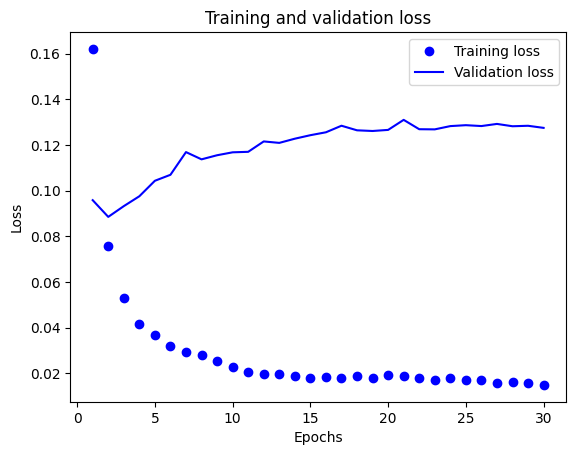

In [46]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

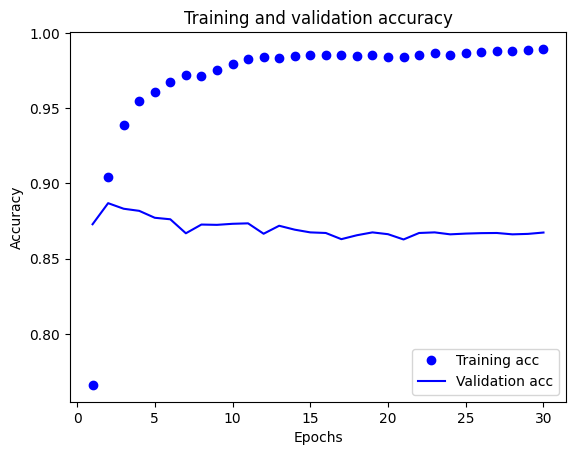

In [47]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

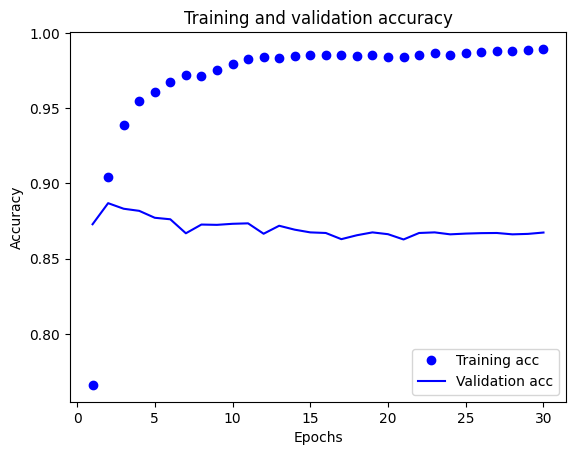

In [48]:
import matplotlib.pyplot as plt

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh",activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 5s 115ms/step - loss: 0.1748 - accuracy: 0.7837 - val_loss: 0.1062 - val_accuracy: 0.8804
Epoch 2/30
30/30 [==============================] - 2s 75ms/step - loss: 0.0881 - accuracy: 0.9106 - val_loss: 0.0965 - val_accuracy: 0.8804
Epoch 3/30
30/30 [==============================] - 2s 64ms/step - loss: 0.0615 - accuracy: 0.9391 - val_loss: 0.0994 - val_accuracy: 0.8791
Epoch 4/30
30/30 [==============================] - 2s 64ms/step - loss: 0.0504 - accuracy: 0.9485 - val_loss: 0.1024 - val_accuracy: 0.8769
Epoch 5/30
30/30 [==============================] - 2s 69ms/step - loss: 0.0413 - accuracy: 0.9596 - val_loss: 0.1036 - val_accuracy: 0.8744
Epoch 6/30
30/30 [==============================] - 2s 65ms/step - loss: 0.0351 - accuracy: 0.9651 - val_loss: 0.1057 - val_accuracy: 0.8748
Epoch 7/30
30/30 [==============================] - 3s 117ms/step - loss: 0.0304 - accuracy: 0.9706 - val_loss: 0.1092 - val_accuracy: 0.8721
Epoch 8/30


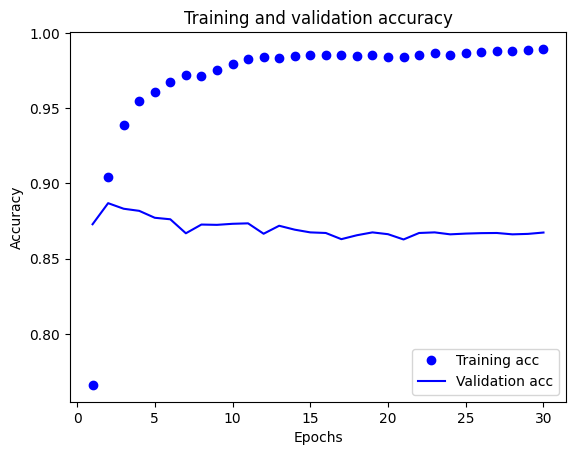

In [50]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

![result.png](attachment:result.png)

# Summary

My approach to tackling the problem involved initially understanding the significance of the Keras Sequential model, which serves as a stack of layers for constructing neural networks. This entailed importing essential modules such as layers, Dense, Dropout, and Regularizers from TensorFlow.keras.

I experimented with building neural networks containing 2, 3, and 6 layers, each with different numbers of hidden neurons (16, 64, and 64 respectively) to assess performance. An important observation was that regardless of the number of layers stacked, the performance plateaued once a certain threshold was reached.

Initializing the Sequential model with model = keras.Sequential() sets up the structure comprising input, hidden, and output layers. Adding a hidden layer with 64 dense units and using the tanh activation function (model.add(Dense(64, activation="tanh")) means creating 64 neurons in the layer to learn vector data.

The Dropout layer (model.add(Dropout(0.5))) plays a crucial role in combating overfitting by randomly dropping out neurons. Specifying 0.5 implies dropping out 50% of the neurons.

Although I experimented with L1 and L2 regularizers, they didn't significantly improve performance and may have even diminished it, suggesting the model may have reached saturation. The best validation accuracy achieved was around 86-87%.

Replacing binary_crossentropy with mean squared error (MSE) for loss evaluation resulted in better performance metrics, with MSE yielding a lower validation loss compared to binary_crossentropy.

ReLU emerged as the preferred activation function over sigmoid and tanh due to its mitigation of the vanishing gradient problem. However, in this context, tanh performed similarly to ReLU.


